
Simulations pour l'article : https://arxiv.org/pdf/physics/0509075.pdf

Membres du groupe :    
- Lilou Soulas
- Amine Razig
- Tony Lauze






**Résumé du "naming game" :**

N personnes sont réunies autour d'un ensemble de M objets, et essaient de créer un langage commun pour désigner ces objets.
Chaque personne dispose d'un inventaire, c'est à dire d'une liste d'associations mot-objet.
Au début du jeu, tous les inventaires sont vides.
A chaque étape, deux personnes sont prises au hasard, l'un parle (le speaker), l'autre écoute (le hearer) et procède à une interaction (voir règles de cette interaction dans l'article, ou dans le petit schéma en-dessous).

[texte du lien](https://)


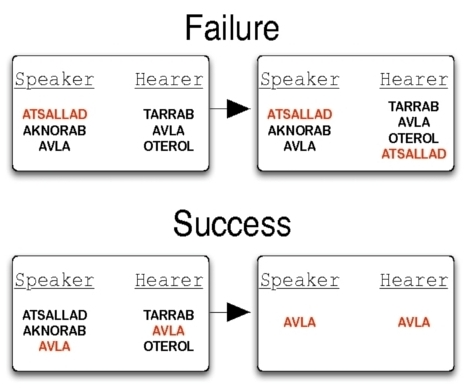

Le système sera représenté par un dictionnaire, où chaque clé (numérotée de 1 à N) est une personne, et où chaque valeur est l'inventaire de la personne.

Pour chaque inventaire, il faudrait donc à nouveau un dictionnaire, mais comme dans l'artcile ils n'utilisent, "sans perte de généralité', qu'un seul objet (c'est à dire M=1),
on aura, au lieu d'un "dictionnaire de dictionnaires", un dictionnaire de listes :

Chaque entrée du dictionnnaire est une personne, et est associée à une liste : la liste des mots dont la personne dispose pour nommer l'objet.


In [ ]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt

'''
On va d'abord créer une fonction qui engendre un "mot" au hasard.
Ici, le "mot" n'a pas besoin d'avoir un sens : ce sera juste une chaine de caractères.
(on aurait pu prendre un nombre aussi, mais il y a 26 lettres différentes contre 9 chiffres différents, donc à taille égale la chaine de caractères offre beaucoup plus de possibilités).
Le plus important est que deux personnes ne puissent pas inventer le même "mot" à deux moments différents.
On s'en "assure" en prenant une longueur assez grande pour la chaine de caractères (par exemple 10).
Il faut donc une fonction qui génère aléatoirement une chaine de caractères de longueur 10 :
'''

def inventer_mot(longueur= 10):
    str = string.ascii_lowercase
    return ''.join(random.choice(str) for i in range(longueur))

'''Test de la fonction'''
print("voici 5 mots aléatoires")
for i in range(5):
  print(inventer_mot())

voici 5 mots aléatoires
zcbvrhxjzp
yllunercnt
ivnslzmium
khdymqwivo
iunyhgulsj


In [ ]:
'''Créons maitenant la classe du naming_game'''


class naming_game():

    def __init__(self, N):
        self.N = N #N est le nombre de personnes prenant part au jeu
        self.system = {i : [] for i in range(1, self.N +1)} #on crée le dictionnaire
        self.T = 0 #initialisation du temps
        self.N_w = 0 #initialisation du nombre total de mots
        self.N_d = 0 #initialisation du nombre de mots différents
        self.nb_succes = 0 #initalisation du nombre d'échanges réussis
        self.S_t = 0 #initialisation du taux de succès


    '''on crée ensuite la fonction qui, à partir d'un speaker et d'un hearer, procède à un échange selon la méthode expliquée dans l'article :'''
    def echange(self, speaker, hearer):

        #ici, speaker et hearer sont les indices (compris entre 1 et N) des 2 personnes qui participent à l'échange

        if self.system[speaker] == []:
        #si l'inventaire du speaker est vide, il invente un mot et l'ajoute à son inventaire
        #comme ce mot ne peut pas déjà exister dans l'inventaire du hearer, on lui ajoute directement aussi
            mot_échangé = inventer_mot()
            self.system[hearer].append(mot_échangé)
            self.system[speaker].append(mot_échangé)
            self.N_w += 2 #On ajoute 2 au nombre total de mots
        else:
        #sinon, le speaker choisit au hasard parmis les mots qu'il a à sa disposition celui qu'il va transmettre au hearer
            mot_échangé = random.choice(self.system[speaker])
            #puis, si le hearer connait déjà le mot, l'échange est un succès : les deux effacent leur inventaire pour n'y laisser que ce mot
            if mot_échangé in self.system[hearer]:
                self.N_w -= len(self.system[hearer]) + len(self.system[speaker]) #On retire à N_w la longueur des deux inventaires
                self.N_w += 2 #On ajoute 2 à N_w
                self.system[hearer].clear()
                self.system[speaker].clear()
                self.system[hearer].append(mot_échangé)
                self.system[speaker].append(mot_échangé)
                self.nb_succes += 1 #On ajoute 1 succès
            else:
            #sinon, le hearer ajoute le mot à son inventaire
                self.system[hearer].append(mot_échangé)
                self.N_w += 1 #On ajoute 1 au nombre total de mots


    '''maintenant, une fonction qui effectue "pour de vrai" une interaction, en choisissant aléatoirement parmi les N personnes un speaker et un hearer'''
    def etape(self):

        speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise
        self.echange(speaker, hearer) #interaction entre le speaker et le hearer

        self.T += 1 #on avance d'une étape

        #on met à jour le nombre de mots différents
        mots_diff = set()
        for personne in self.system.keys():
          mots_diff.update(set(self.system[personne]))
        self.N_d = len(mots_diff)

        #on met à jour le taux de succès
        self.S_t = self.nb_succes / self.T


    '''une fonction qui effectue E étapes et enregistre à chaque fois les valeurs du système dans des listes'''
    def etapes(self, E):

        #On initialise l'abscisse
        x = [0]

        #On intialise l'ordonnée pour N_w, N_d, S_t
        y_N_w = [0]
        y_N_d = [0]
        y_S_t = [0]

        #On va procéder à 30 000 étapes, et ajouter à chaque fois les valeurs dans les listes
        while self.T < E:
            self.etape()
            x.append(self.T)
            y_N_w.append(self.N_w)
            y_N_d.append(self.N_d)
            y_S_t.append(self.S_t)

        return [x, y_N_w, y_N_d, y_S_t] #liste contenant les 4 listes de valeurs


    '''enfin, la fonction qui trace l'évolution des valeurs du système'''
    def etapes_et_graph(self, E):

        valeurs = self.etapes(E) #on effectue E étapes à l'aide de la fonction précédente

        #Il ne reste plus qu'à tout tracer...

        #création de la fenêtre graphique
        plt.figure(1,figsize=(10,12))
        plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0.15)

        #division de la fenêtre en 3 lignes, 1 colonne, et remplissage de la première ligne
        plt.subplot(3,1,1)
        G_N_w = plt.plot(valeurs[0], valeurs[1])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('N_w(t)')
        #plt.semilogx() si jamais on veut une échelle logarithmique

        plt.subplot(3,1,2)
        G_N_d = plt.plot(valeurs[0], valeurs[2])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('N_d(t)')

        plt.subplot(3,1,3)
        G_S_t = plt.plot(valeurs[0], valeurs[3])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('S_t')

        plt.show()

    def equilibre_et_graph(self):
        self.etapes_et_graph(60000)

    def equilibre(self):
        return self.etapes(60000)

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: []}
1
1
{1: [], 2: [], 3: [], 4: ['dkgqjubllq'], 5: [], 6: [], 7: [], 8: [], 9: [], 10: ['dkgqjubllq']}
2
1
{1: [], 2: [], 3: [], 4: ['dkgqjubllq'], 5: ['dkgqjubllq'], 6: [], 7: [], 8: [], 9: [], 10: ['dkgqjubllq']}
3
1
{1: [], 2: [], 3: ['dkgqjubllq'], 4: ['dkgqjubllq'], 5: ['dkgqjubllq'], 6: [], 7: [], 8: [], 9: [], 10: ['dkgqjubllq']}
4
2
{1: [], 2: [], 3: ['dkgqjubllq'], 4: ['dkgqjubllq'], 5: ['dkgqjubllq'], 6: [], 7: [], 8: ['ziyrdfwaoh'], 9: ['ziyrdfwaoh'], 10: ['dkgqjubllq']}
5
2
{1: [], 2: [], 3: ['dkgqjubllq'], 4: ['dkgqjubllq'], 5: ['dkgqjubllq'], 6: ['ziyrdfwaoh'], 7: [], 8: ['ziyrdfwaoh'], 9: ['ziyrdfwaoh'], 10: ['dkgqjubllq']}


<ipython-input-2-af0cf395a170>:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


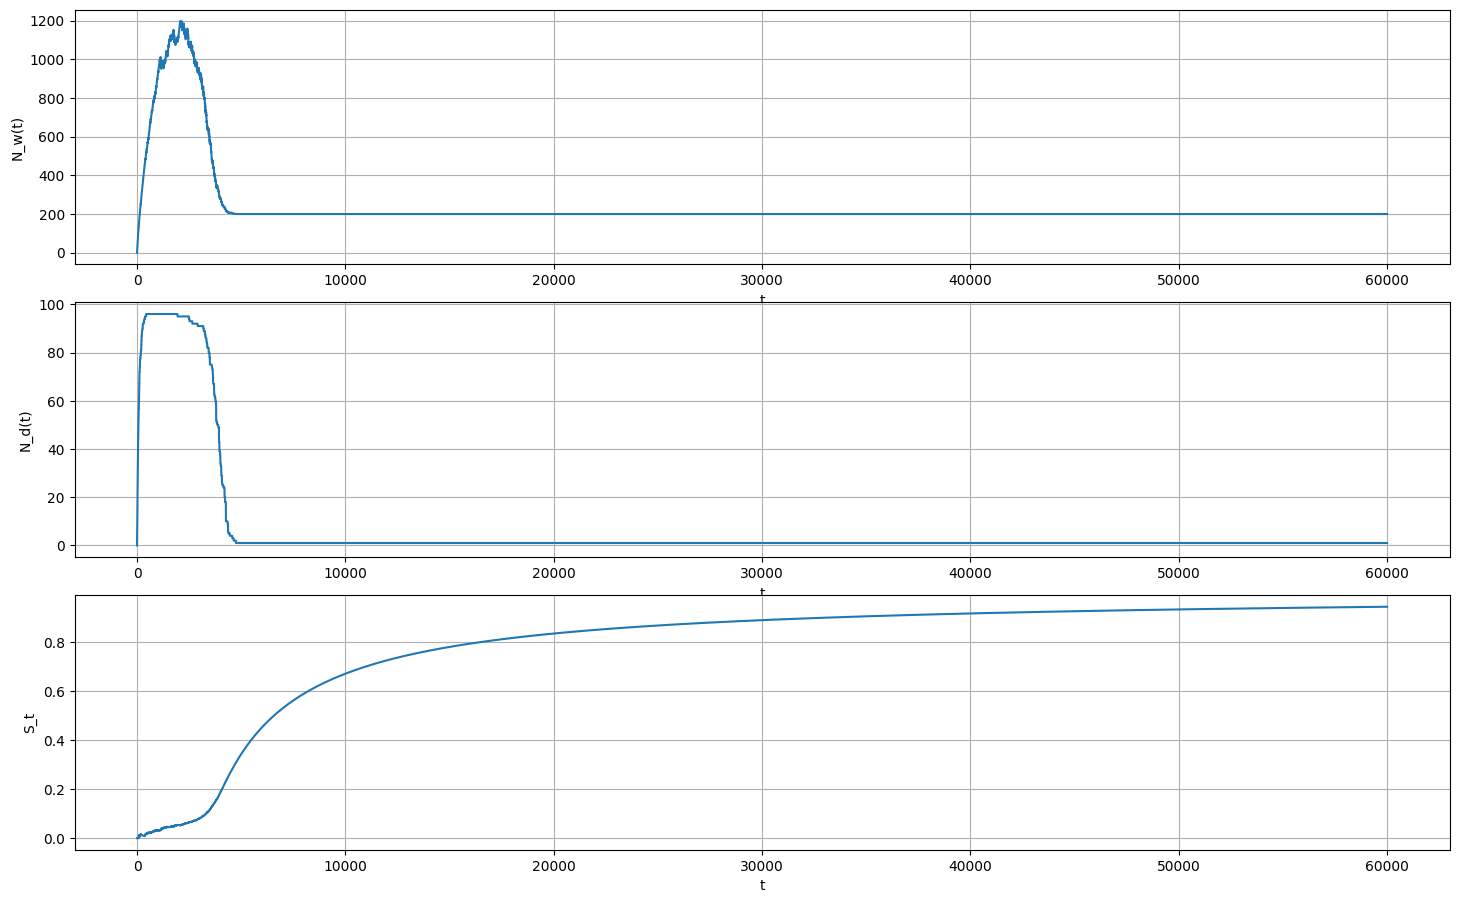

"Remarques :\n\nTout semble bien marcher : \nL'allure des courbes est la même que celles de l'article.\nN_w  a bien un asymptote égale au nombre de personnes.\nS_t a bien une asymptote égale à 1\nN_d a bien un maximum environ égal à N/2 et a une asymptote égale à 1"

In [ ]:
'''Test'''

'''créer un jeu avec 10 personnes'''

Jeu1 = naming_game(10) #avec 100 personnes
print(Jeu1.system)

'''regarder l'évolution du dictionnaire et des indicateurs sur les premières étapes'''

for i in range(5): #on effectue 5 étapes
    Jeu1.etape()
    print(Jeu1.T)
    print(Jeu1.N_d)
    print(Jeu1.system)

'''regarder l'allure des courbes pour une plus grande valeur de N'''
Jeu2 = naming_game(200)
Jeu2.equilibre_et_graph()

'''Remarques :

Tout semble bien marcher :
L'allure des courbes est la même que celles de l'article.
N_w  a bien un asymptote égale au nombre de personnes.
S_t a bien une asymptote égale à 1
N_d a bien un maximum environ égal à N/2 et a une asymptote égale à 1'''

In [ ]:
'''On créée une fonction qui va faire la moyenne des courbes sur un grand nombre d'essais.
N est le nombre de personnes
C est le nombre de courbes dont on veut faire la moyenne
'''

def moyenne(N, C, I=60000):

    #fonction très simple qui fait la moyenne d'une liste
    def moyenne(liste):
        return sum(liste) / len(liste)

    #on crée des dictionnaires pour stocker les listes de valeurs dont on fera ensuite la moyenne
    dic_resultats_N_w = dict([(i,[]) for i in range(I)])
    dic_resultats_N_d = dict([(i,[]) for i in range(I)])
    dic_resultats_S_t = dict([(i,[]) for i in range(I)])

    #on va faire la moyenne de C courbes
    for i in range(C):
        system = naming_game(N)
        valeurs = system.equilibre()
        for j in range(I):
            dic_resultats_N_w[j].append(valeurs[1][j])
            dic_resultats_N_d[j].append(valeurs[2][j])
            dic_resultats_S_t[j].append(valeurs[3][j])

    y_N_w = [moyenne(dic_resultats_N_w[i]) for i in range(I)]
    y_N_d = [moyenne(dic_resultats_N_d[i]) for i in range(I)]
    y_S_t = [moyenne(dic_resultats_S_t[i]) for i in range(I)]

    return [y_N_w, y_N_d, y_S_t]

def moyenne_et_graph(N, C, I=60000):

    valeurs = moyenne(N, C)

    #initialisation de l'abscisse
    x = list(range(I))

    #création de la même fenêtre graphique que dans la fonction equilibre_et_graph()
    plt.figure(1,figsize=(10,12))
    plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                      top = 0.9, wspace = 0.5, hspace = 0.15)

    #division de la fenêtre en 3 lignes, 1 colonne, et remplissage de la première ligne
    plt.subplot(3,1,1)
    G_N_w = plt.plot(x, valeurs[0])
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('N_w(t)')
    #plt.semilogx() si jamais on veut une échelle logarithmique

    plt.subplot(3,1,2)
    G_N_d = plt.plot(x, valeurs[1])
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('N_d(t)')

    plt.subplot(3,1,3)
    G_S_t = plt.plot(x, valeurs[2])
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('S_t(t)')

    plt.show()

<ipython-input-2-af0cf395a170>:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


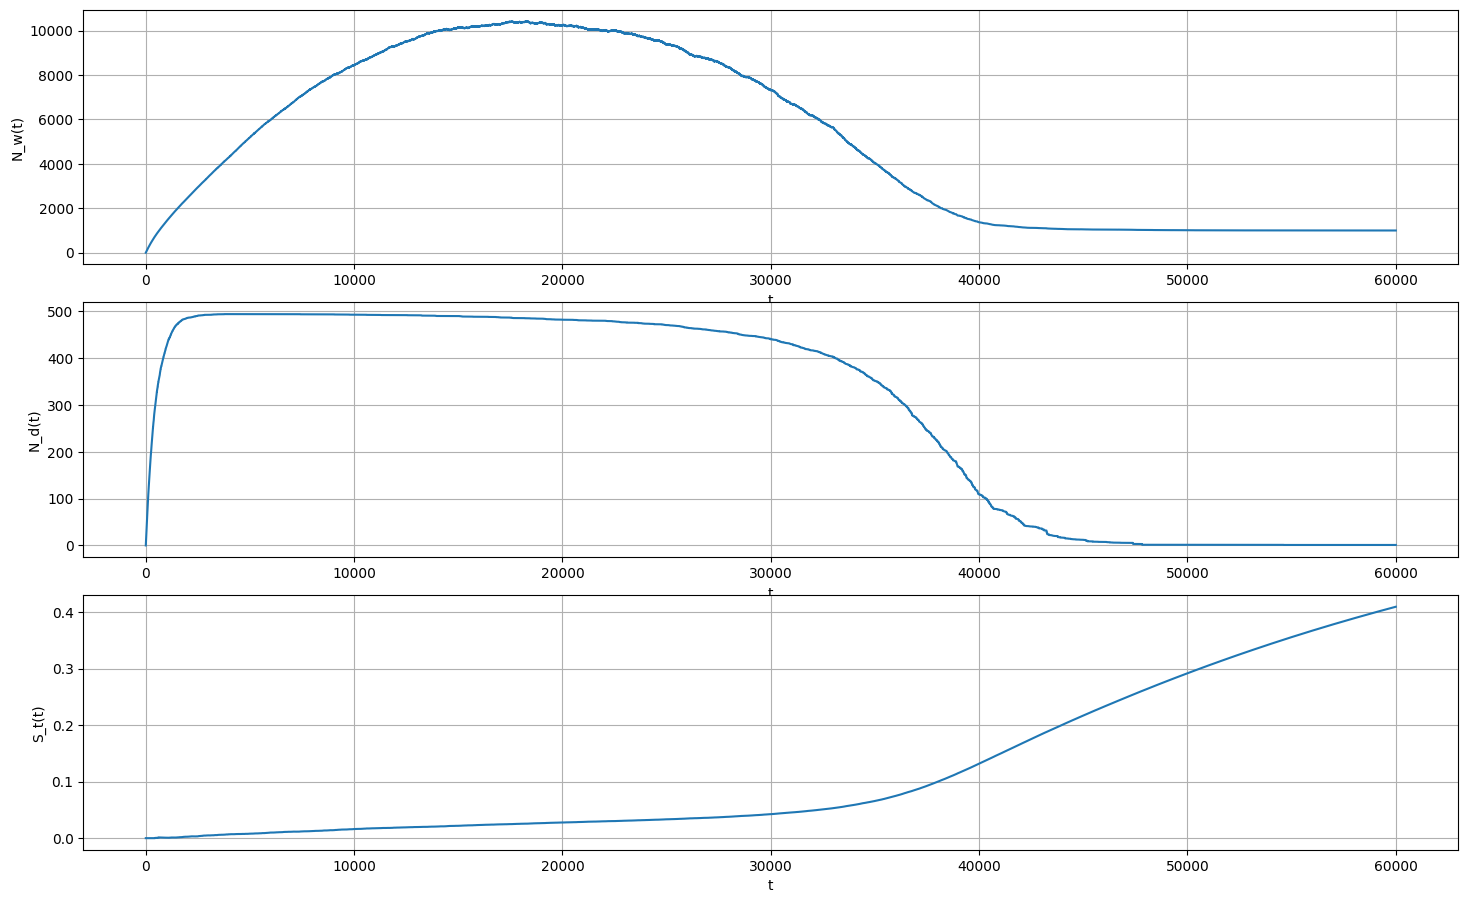

"On retrouve bien le même type de courbes que celles obtenues dans l'article"

In [ ]:
'''Test'''

moyenne_et_graph(1000, 5)

'''On retrouve bien le même type de courbes que celles obtenues dans l'article'''


In [ ]:
'''
Maintenant, on va essayer reproduire deux autres résultats de l'article : le nombre maximum de mots N_w, ainsi que le moment (t_max) auquel survient ce maximum,
dépendent de N suivant une loi de puissance.
'''

'''fonction qui prend en argument les valeurs de N pour lesquels ont veut obtenir les valeurs souhaitées'''
def max_et_t_max(N_min, N_max, N_pas):

  #on initialise le vecteur où on va faire varier le nombre de personnes N
  x_N = range(N_min, N_max, N_pas)

  N_w_max_list = []
  t_max_list = []

  for N in x_N:
    valeurs = moyenne(N, C=3, I=60000) #pour chaque valeur de N, on commence par faire la moyenne de 3 courbes (le temps d'exécution est déjà long...)

    N_w_max = max(valeurs[0]) #on récupère la valeur maximum de N_w
    N_w_max_list.append(N_w_max)

    t_max = valeurs[0].index(N_w_max) #on récupère l'indice de ce maximum, c'est à dire t_max
    t_max_list.append(t_max)

  return [x_N, N_w_max_list, t_max_list]

'''fonction qui trace les résultats'''
def max_et_t_max_graph(N_min, N_max, N_pas):

  valeurs = max_et_t_max(N_min, N_max, N_pas)

  #création de la même fenêtre graphique que dans la fonction equilibre_et_graph()
  plt.figure(1,figsize=(10,10))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                    top = 0.9, wspace = 0.5, hspace = 0.15)

  #division de la fenêtre en 3 lignes, 1 colonne, et remplissage de la première ligne
  plt.subplot(2,1,1)
  G_N_w = plt.plot(valeurs[0], valeurs[1])
  plt.grid()
  plt.xlabel('N')
  plt.ylabel('N_w_max')
  #plt.semilogx() si jamais on veut une échelle logarithmique

  plt.subplot(2,1,2)
  G_N_d = plt.plot(valeurs[0], valeurs[2])
  plt.grid()
  plt.xlabel('N')
  plt.ylabel('t_max_N_w')




<ipython-input-2-af0cf395a170>:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


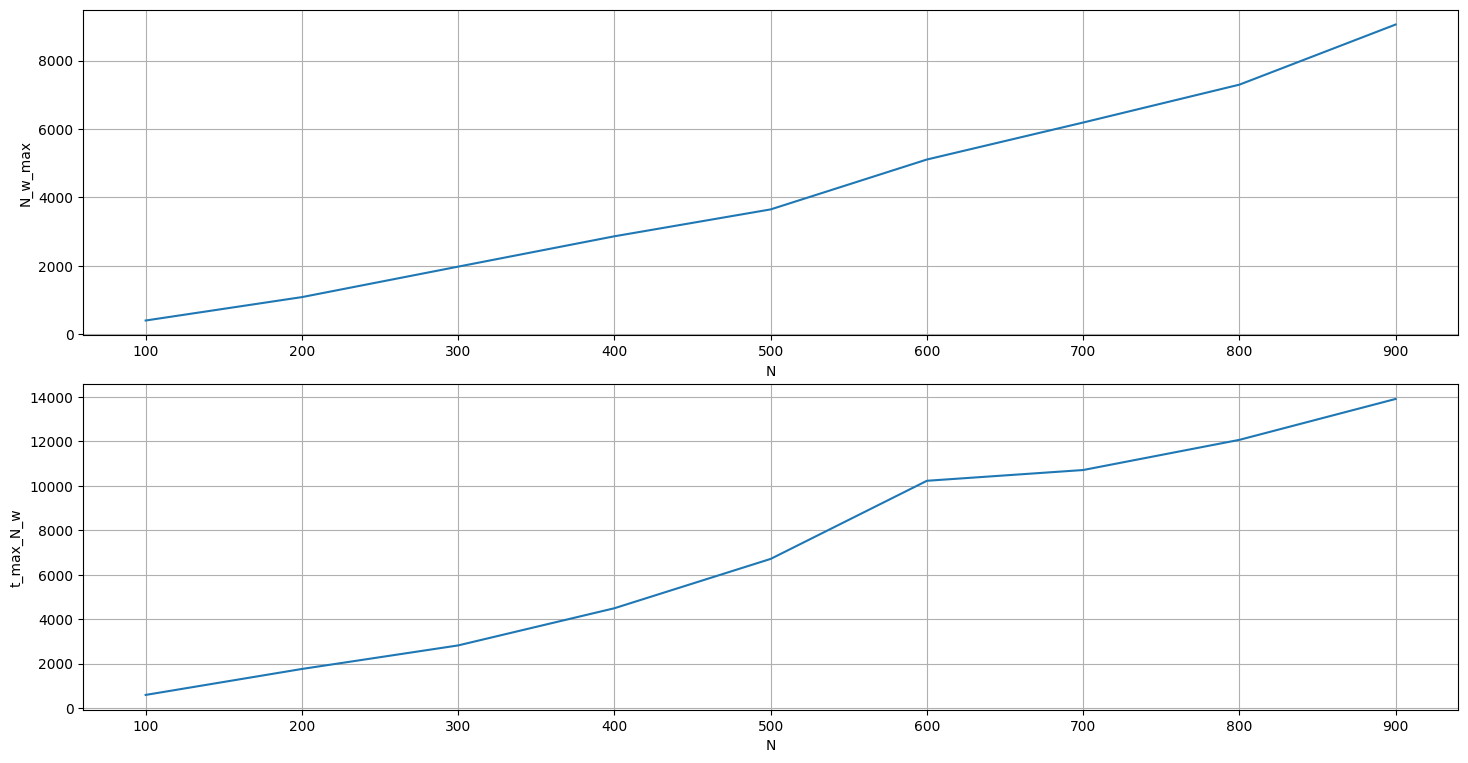

In [ ]:
'''Test'''
'''ATTENTION : cette fonction prend du temps à s'exécuter...
Nous n'avons pu la tester que pour des "petites" valeurs de N, tandis que dans l'article ils testent des valeurs de N jusqu'à 10^4 ou 10^5
Cependant on peut voir un petit début de loi de puisssance'''

max_et_t_max_graph(100, 1000, 100)



In [ ]:
'''
Representation de l'évolution du taux de réussite dans le système en faisant varier le nombre d'agents (N)

A partir de la fonction précendente qui fait la moyenne des courbes sur un grand nombre d'essais.
On fait varier N pour représenter la courbes des taux de réussites selon la taille du systeme.


- N est le nombre de personnes
- C est le nombre de courbes
'''

def moyenne(liste):
  """
  retourne la moyenne d'une liste
  """
  return sum(liste) / len(liste)


def moyenne_graph_St(C):

    #initialisation de l'abscisse
    I = 60000 #nombre d'étapes
    x = list(range(I))

    N_list=[50,100,500,1000]  # N varie de 50 à 50 000

    #on crée des dictionnaires pour stocker les listes de valeurs dont on fera ensuite la moyenne

    dic_resultats_S_t = dict([(i,[]) for i in range(I)])

    # On itere pour chacuns des nombre d'agents du systeme
    for N in N_list :
      #on va faire la moyenne de C courbes
      for i in range(C):
          system = naming_game(N)
          valeurs = system.equilibre()
          for j in range(I):
              dic_resultats_S_t[j].append(valeurs[3][j])

      y_S_t = [moyenne(dic_resultats_S_t[i]) for i in range(I)]

      #création de la même fenêtre graphique que dans la fonction equilibre_et_graph()
      plt.figure(1,figsize=(10,12))
      plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                        top = 0.9, wspace = 0.5, hspace = 0.15)

      G_S_t = plt.plot(x, y_S_t, label='N : '+ str(N) )
      plt.grid()
      plt.xlabel('t')
      plt.ylabel('S_t')
      plt.legend()
      plt.semilogx()

    plt.show()


<ipython-input-4-af0cf395a170>:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


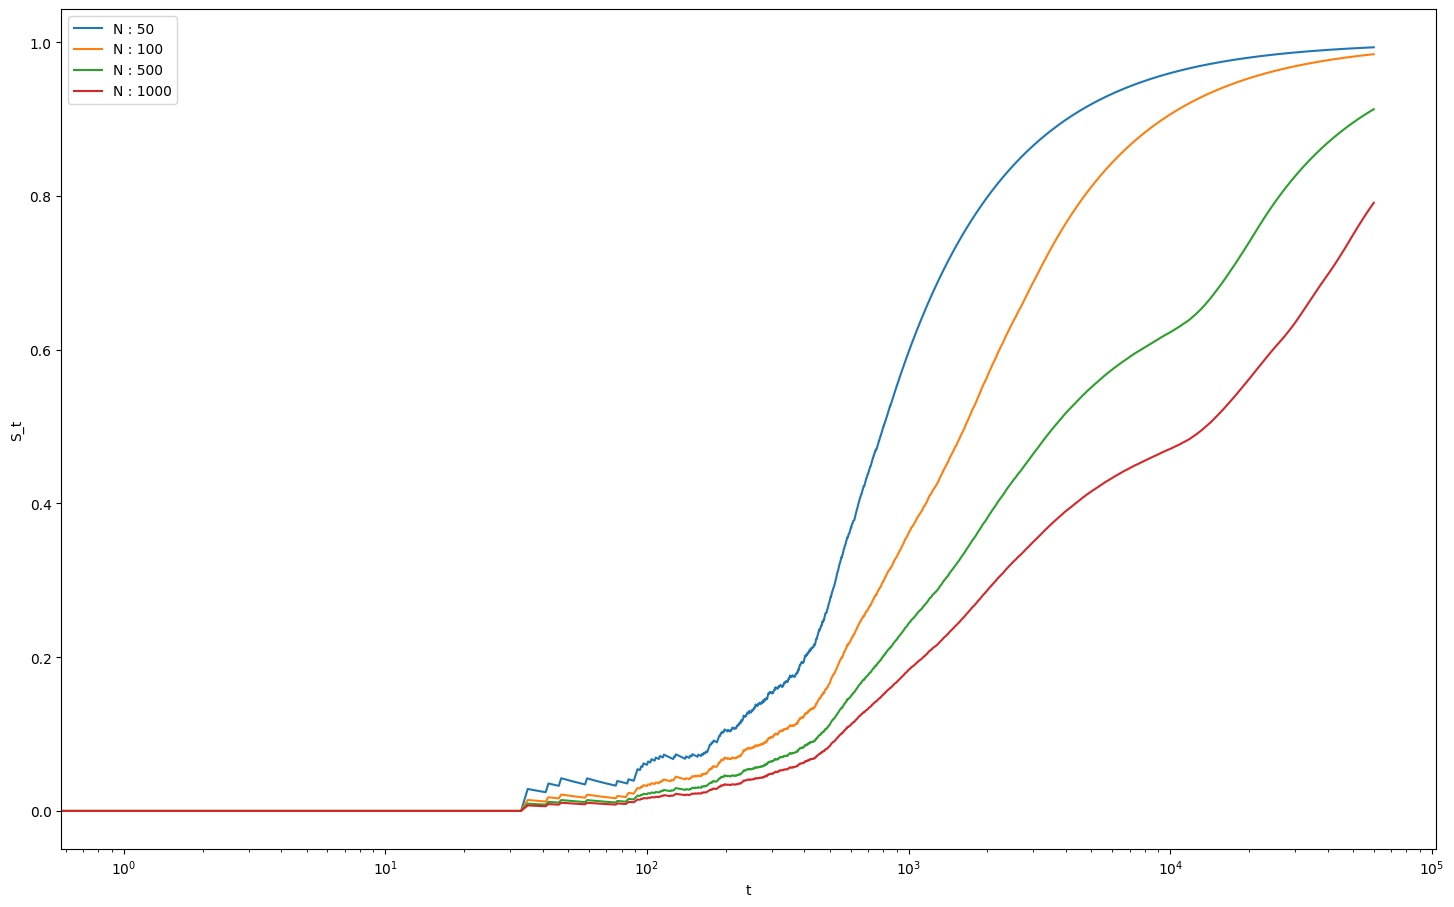

In [ ]:
moyenne_graph_St(2)
# remarque : l'execution peut etre un peu longue si le nombre d'agents est élevé.
# Observation : On observe assez bien la relation qui lie le nombre d'agent et la vitesse de trasition de l'état
#               désordonné à l'état ordonné (tx de réussite -> 1)
#Plus le nombre d'agents augmente, plus l'équilibre met du temps à se produire, donc plus le taux de réussite augmentera lentement

**Variante aléatoire du naming game :**

Nous allons créer nous-mêmes une variante du naming game qui incorpore davantage d'aléatoire.

Désormais, lorsqu'une interaction a lieu, et qu'un mot doit passer d'un inventaire à un autre,
on considère qu'il peut y avoir un quiproquo (avec une probabilité p comprise entre 0 et 1) :
celui qui reçoit le mot ne le comprend pas bien, fait une erreur, et garde un mot différent de l'original.

De même, dans le cas où les deux personnes ont déjà le mot en commun dans leur inventaire,
on considère qu'il peut y avoir un quiproquo : elles pensent se mettre d'accord sur un mot mais ne gardent pas le même !

On voit tout de suite qu'avec p=1, c'est à dire avec des personnes particulièrement inattentives, il ne pourra pas y avoir d'équilibre,
puisqu'un mot ne pourra jamais se trouver deux fois dans le système. Avec une valeur de p inféieure à 1, un mot pourra se trouver plusieurs fois dans le système,
mais la propagation des mots est ralentie par les quiproquo qui ajoutent du chaos au système.

On cherche alors si les quiproquos empêchent le système de s'équilibrer, et pour quelle valeur maximale de p le système peut s'équilibrer.

In [ ]:
'''
On créée exactement la même classe que naming game, avec quelques modifications
mineures : une disjonction de cas au moment de chaque échange, en fonction de l'occurence d'un quiproquo ou non.
'''

class naming_game_quiproquo():

    def __init__(self, N, p):
        self.N = N #N est le nombre de personnes prenant part au jeu
        self.system = {i : [] for i in range(1, self.N +1)} #on crée le dictionnaire
        self.T = 0 #initialisation du temps
        self.N_w = 0 #initialisation du nombre total de mots
        self.N_d = 0 #initialisation du nombre de mots différents
        self.nb_succes = 0 #initalisation du nombre d'échanges réussis
        self.S_t = 0 #initialisation du taux de succès
        self.p = p #la probabilité de quiproquo


    '''on crée ensuite la fonction qui, à partir d'un speaker et d'un hearer, procède à un échange selon notre nouvelle procédure :'''
    def echange(self, speaker, hearer):
        #ici, speaker et hearer sont les indices (compris entre 1 et N) des 2 personnes qui participent à l'échange

        #déterminons d'abord s'il va y avoir un quiproquo lors de l'échange
        quiproquo = -1
        if np.random.binomial(size=1, n=1, p=self.p) == 1:
          quiproquo = 1 #il y a un quiproquo
        else:
          quiproquo = 0 #il n'y a pas de quiproquo

        if quiproquo == 0: #l'échange normal a lieu
          if self.system[speaker] == []:
          #si l'inventaire du speaker est vide, il invente un mot et l'ajoute à son inventaire
          #comme ce mot ne peut pas déjà exister dans l'inventaire du hearer, on lui ajoute directement aussi
              mot_échangé = inventer_mot()
              self.system[hearer].append(mot_échangé)
              self.system[speaker].append(mot_échangé)
          else:
          #sinon, le speaker choisit au hasard parmis les mots qu'il a à sa disposition celui qu'il va transmettre au hearer
              mot_échangé = random.choice(self.system[speaker])
              #puis, si le hearer connait déjà le mot, l'échange est un succès : les deux effacent leur inventaire pour n'y laisser que ce mot
              if mot_échangé in self.system[hearer]:
                  self.system[hearer].clear()
                  self.system[speaker].clear()
                  self.system[hearer].append(mot_échangé)
                  self.system[speaker].append(mot_échangé)
                  self.nb_succes += 1 #On ajoute 1 succès
              else:
              #sinon, le hearer ajoute le mot à son inventaire
                  self.system[hearer].append(mot_échangé)

        elif quiproquo == 1: #l'échange avec quiproquo a lieu
          if self.system[speaker] == []:
          #si l'inventaire du speaker est vide, il invente un mot et l'ajoute à son inventaire
            mot_échangé = inventer_mot()
            self.system[hearer].append(inventer_mot()) #le hearer invente lui aussi un mot
            self.system[speaker].append(mot_échangé)
          else:
          #sinon, le speaker choisit au hasard parmis les mots qu'il a à sa disposition celui qu'il va transmettre au hearer
            mot_échangé = random.choice(self.system[speaker])
            #puis, si le hearer connait déjà le mot,
            #soit il ne connait que ce mot là, et alors on va considérer qu'il ne peut pas y avoir de quiproquo
            #alors soit il en connait d'autres, alors il confond et ajoute le mauvaise mot à son dictionnaire
            if mot_échangé in self.system[hearer]:
              if len(self.system[hearer]) == 1:
                self.system[hearer].clear()
                self.system[speaker].clear()
                self.system[hearer].append(mot_échangé)
                self.system[speaker].append(mot_échangé)
              else:
                self.system[hearer].remove(mot_échangé)
                mot_hearer = random.choice(self.system[hearer])
                self.system[hearer].clear()
                self.system[speaker].clear()
                self.system[hearer].append(mot_hearer)
                self.system[speaker].append(mot_échangé)
            else:
            #sinon, le hearer ajoute un nouveau mot à son inventaire
                self.system[hearer].append(inventer_mot())



    '''maintenant, une fonction qui effectue "pour de vrai" une interaction, en choisissant aléatoirement parmi les N personnes un speaker et un hearer'''
    def etape(self):

        speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise
        self.echange(speaker, hearer) #interaction entre le speaker et le hearer

        self.T += 1 #on avance d'une étape

        #on met à jour le nombre de mots différents
        mots_diff_list = list()

        for personne in self.system.keys():
          mots_diff_list = mots_diff_list + self.system[personne]

        self.N_d = len(set(mots_diff_list))
        self.N_w = len(mots_diff_list)

        #on met à jour le taux de succès
        self.S_t = self.nb_succes / self.T


    '''une fonction qui effectue E étapes et enregistre à chaque fois les valeurs du système dans des listes'''
    def etapes(self, E):

        #On initialise l'abscisse
        x = [0]

        #On intialise l'ordonnée pour N_w, N_d, S_t
        y_N_w = [0]
        y_N_d = [0]
        y_S_t = [0]

        #On va procéder à 30 000 étapes, et ajouter à chaque fois les valeurs dans les listes
        while self.T < E:
            self.etape()
            x.append(self.T)
            y_N_w.append(self.N_w)
            y_N_d.append(self.N_d)
            y_S_t.append(self.S_t)

        return [x, y_N_w, y_N_d, y_S_t] #liste contenant les 4 listes de valeurs

    '''enfin, la fonction qui trace l'évolution des valeurs du système'''
    def etapes_et_graph(self, E):

        valeurs = self.etapes(E) #on effectue E étapes à l'aide de la fonction précédente

        #création de la fenêtre graphique
        plt.figure(1,figsize=(10,12))
        plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0.15)

        #division de la fenêtre en 3 lignes, 1 colonne, et remplissage de la première ligne
        plt.subplot(3,1,1)
        G_N_w = plt.plot(valeurs[0], valeurs[1])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('N_w(t)')
        #plt.semilogx() si jamais on veut une échelle logarithmique

        plt.subplot(3,1,2)
        G_N_d = plt.plot(valeurs[0], valeurs[2])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('N_d(t)')

        plt.subplot(3,1,3)
        G_S_t = plt.plot(valeurs[0], valeurs[3])
        plt.grid()
        plt.xlabel('t')
        plt.ylabel('S_t')

        plt.show()

    def equilibre_et_graph(self):
        self.etapes_et_graph(30000)

    def equilibre(self):
        return self.etapes(30000)

<ipython-input-113-18bc6eba7ba9>:97: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


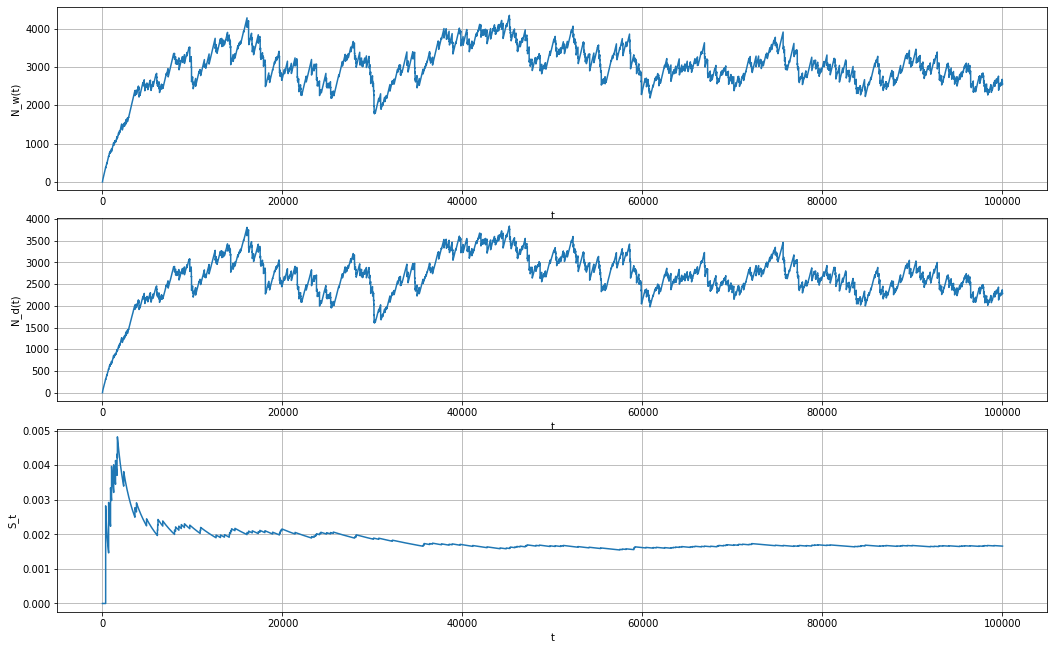

In [ ]:
'''test'''
'''avec 50 personnes et p=0.8'''
test = naming_game_quiproquo(50, 0.8)

test.equilibre_et_graph()

'''On voit que le système devient chaotique
Dans ce cas précis on devine qu'il n'y aura pas d'équilibre car le taux de succès S_t atteint une asymptote proche de 0'''


In [ ]:
'''
Maintenant, le but est de trouver (empiriquement) la valeur critique de p (si elle existe) au-delà de laquelle le système atteint un équilibre,
(c'est à dire parvient à l'hégémonie d'un seul mot) pour différentes valeurs de N.

A cause de contraintes de durée d'exécution (dès que N est assez grand et p proche de 1, le système devient chaotique et prend beaucoup de temps à s'exécuter),
on va se limiter à des valeurs de N faibles, mais à un "grand" nombre d'étapes (30 000), qui devraient permettre de voir si le système peut parvenir à un équilibre,
l'objectif étant surtout de savoir quelle valeur de p est critique.
Ainsi, si au bout des 30 000 étapes, il y a plus d'un mot dans le système, on considérera qu'il n'y a pas d'équilibre.

Idéalement, il faudrait faire là aussi une moyenne sur un grand nombre de courbes, mais pour des raisons de durée d'éxécution, ce n'était pas possible.
'''

#fonction qui va calculer p_critique pour un nombre donné N de personnes.
def valeur_critique_p(N):

  x= np.linspace(0, 1, 20) #vecteur des valeurs de p, comprises entre 0 et 1
  res_conv = [] #résultats de convergence : 1 si le système converge, 0 sinon
  res_temps_conv = []
  p_critique = 0

  #pour chaque valeur de N, on regarde s'il y a convergence,
  #auquel cas on ajoute 1 à la liste et on met à jour la valeur de p_critique, sinon on ajoute 0 à la liste
  for p in x:
    jeu = naming_game_quiproquo(N, p)
    valeurs = jeu.equilibre()
    if valeurs[2][-1] == 1:
      res_conv.append(1)
      res_temps_conv.append(valeurs[1].index(max(valeurs[1])))
      p_critique = p

    else:
      break #on va compléter manuellement le reste de la liste pour gagner en temps d'exécution (ce sont les valeurs de p proches de 1 qui prennent du temps)

  while len(res_conv) != len(x):
    res_conv.append(0)
    res_temps_conv.append(0)

  return [x, res_conv, p_critique, res_temps_conv]

#fonction qui trace l'état du système en fonction de p et met en valeur p_critique
def valeur_critique_p_graph(N):

  valeurs = valeur_critique_p(N)

  plt.figure(1,figsize=(5,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                    top = 0.9, wspace = 0.5, hspace = 0.15)

  plt.plot(valeurs[0], valeurs[1])
  plt.plot(valeurs[2], 0, marker="o", color="red")
  plt.grid()
  plt.xlabel('valeur de p')
  plt.ylabel('Etat de convergence du système')


def temps_conv_graph(N):

  x= np.linspace(0, 1, 20) #vecteur des valeurs de p, comprises entre 0 et 1
  res_temps_conv = []
  p_critique = 0

  #pour chaque valeur de N, on regarde s'il y a convergence,
  #auquel cas on ajoute 1 à la liste et on met à jour la valeur de p_critique, sinon on ajoute 0 à la liste
  for p in x:
    jeu = naming_game_quiproquo(N, p)
    valeurs = jeu.equilibre()
    if valeurs[2][-1] == 1:
      res_temps_conv.append(valeurs[1].index(max(valeurs[1])))
      p_critique = p
    else:
      res_temps_conv.append(valeurs[1].index(max(valeurs[1])))

  plt.figure(1,figsize=(5,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                    top = 0.9, wspace = 0.5, hspace = 0.15)

  plt.plot(x, res_temps_conv)
  plt.plot(p_critique, 0, marker="o", color="red")
  plt.grid()
  plt.xlabel('valeur de p')
  plt.ylabel('Temps de convergence du système')


<ipython-input-17-137ad624d13f>:85: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


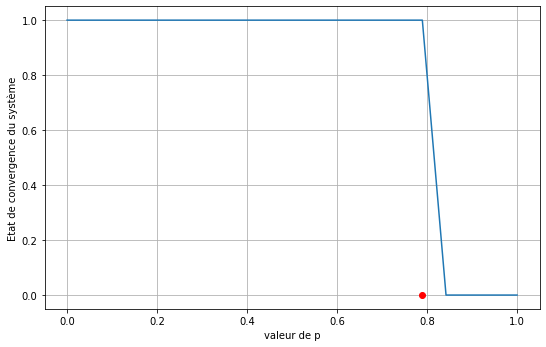

In [ ]:
'''Test'''
valeur_critique_p_graph(N=5)

'''On observe bien une transition brutale entre les valeurs de p pour lesquelles il y a équilibre, et celles pour lesquelles le système n'atteint pas d'équilibre
(dans la limite d'étapes qu'on a fixée)
'''


<ipython-input-17-137ad624d13f>:85: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


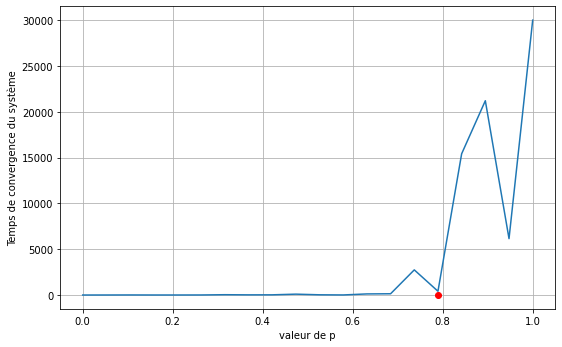

In [ ]:
'''test'''

temps_conv_graph(N=5)

'''Là encore, une transition brutale entre les valeurs où l'équilibre se fait (temps de convergence très faible)
Et les valeurs où l'équilibre n'a pas lieu'''

<ipython-input-17-137ad624d13f>:85: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  speaker, hearer = random.sample(self.system.keys(), 2) #fonction qui fait deux tirages parmi la liste des personnes, sans remise


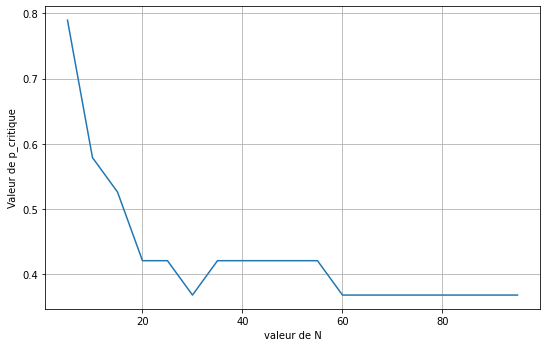

In [ ]:
'''Après plusieurs tests, on remarque quelque chose d'intéressant : plus on diminue le nombre de personnes N, plus la valeur de p_critique semble augmenter.
Vérifions cela par un graphique, pour des "petites" valeurs de N car le programme met beaucoup de temps'''

def evolution_p_critique_N():

  x_N = range(5, 100, 5)
  p_list = []

  for x in x_N:
    p_critique = valeur_critique_p(N=x)[2]
    p_list.append(p_critique)

  return [x_N, p_list]

def evolution_graph():
  valeurs = evolution_p_critique_N()

  plt.figure(1,figsize=(5,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                    top = 0.9, wspace = 0.5, hspace = 0.15)

  plt.plot(valeurs[0], valeurs[1])
  plt.grid()
  plt.xlabel('valeur de N')
  plt.ylabel('Valeur de p_critique')

evolution_graph()

'''
On observe bien la décroissance de p_critique quand N augmente,
Pour ne pas avoir "d'asymptote" quand N augmente, il faudrait augmenter le nombre d'étapes pour donner plus de temps au système pour s'équilibrer
'''

**Conlusion :**

Toutes les simulations que nous avons opérées concordaient avec les résultats de l'article. En particulier, le suivi dans le temps d'un unique système fonctionne bien, et nous a permis de suivre graphiquement l'évolution des indicateurs choisis dans l'article (N_w, N_d, et S_t).

Cependant, quand il s'agissait de faire la moyenne de nombreuses simulations sur un grand nombre de personnes et d'étapes, la durée d'exécution devenait vite importante.

Nous avons choisi d'explorer une variante du "naming game" tel qu'il est décrit dans l'article, en incorporant davantage d'aléatoire, avec la possibilité d'échanges "ratés", de fiascos langagiers entre les personnes (et qui s'interprètent comme des quiproquos, des échecs de communication).

Nous avons alors remarqué que plus le système comporte de personnes, moins il est résilient face à la possibilité de quiproquos, tandis que lorsqu'il y a peu de personnes, même une probabilité élevé d'échanges ratés modifie peu la tendance du système à s'équilibrer dans le temps.

Ainsi, il semble que pour une même proportion de "distraits" ou "d'inattentifs" ou de "malentendants" au sein d'une population, plus celle-ci est vaste, plus elle aura du mal à harmoniser son langage.